In [1]:
#select the folder for exporting data to
folder = 'naive_bayes'

**Naive Bayes Classification with recovered subjects labelled at healthy initially**

I had to label the recovered as healthy because I will be using only the healthy and injured subjects as training data and then will test on the recovered individuals. Hopefully, the majoirty of the minute 1 strides will classify as healthy and minute 21 as injured, and the conclusion could follow that fatigue seems to make individuals run more like injured individuals and puts runners at greater risk of reinjury.

In [2]:
#import packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB

#import mean squared error metric
from sklearn.metrics import mean_squared_error

#import warnings and ignore them
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [3]:
#import data
data_strides = pd.read_csv('/Users/rossbrancati/Desktop/PFP_Project/machine_learning/machine_learning_data/PC_scores_matrix/strides/first_three_pcs_strides.csv')
data_strides = data_strides.drop(columns=['Unnamed: 0'])
#data_means = pd.read_csv('/Users/rossbrancati/Desktop/PFP_Project/machine_learning/machine_learning_data/PC_scores_matrix/means/first_three_pcs_means.csv')
#data_means = data_means.drop(columns=['Unnamed: 0'])

In [4]:
#add the minimum value to the data_strides and data_means dataframes so that the naive bayes algorithm won't throw and error
data_strides += (data_strides.values.min()*-1)

In [5]:
data_strides.head()

,ankle_angle_x_PC_1,ankle_angle_x_PC_2,ankle_angle_x_PC_3,ankle_angle_y_PC_1,ankle_angle_y_PC_2,ankle_angle_y_PC_3,ankle_angle_z_PC_1,ankle_angle_z_PC_2,ankle_angle_z_PC_3,ankle_moment_x_PC_1,...,soleus_PC_3,tibialis_anterior_PC_1,tibialis_anterior_PC_2,tibialis_anterior_PC_3,vastus_lateralis_PC_1,vastus_lateralis_PC_2,vastus_lateralis_PC_3,vastus_medialis_PC_1,vastus_medialis_PC_2,vastus_medialis_PC_3
0,10.725722,8.295037,7.631324,7.177499,8.574948,4.892421,9.313970,3.498801,11.367505,7.779233,...,7.665007,7.107513,6.824452,2.736661,5.936944,6.820929,8.705999,7.109115,6.326280,9.134471
1,10.835657,8.417921,8.016282,7.975346,9.169036,4.066153,8.776859,3.569695,9.699613,8.074732,...,7.505312,6.619559,7.069305,2.610054,7.119576,6.277632,8.922381,7.488082,6.307943,8.675812
2,11.059131,8.126880,7.724714,8.071058,8.569312,4.144020,8.925024,4.021381,9.616159,7.603390,...,7.576087,6.871169,6.580419,2.910289,6.207596,7.146246,8.138293,5.956987,7.008767,8.616704
3,10.846325,8.087606,7.356349,7.291421,7.910803,4.677966,8.794425,4.053021,10.424897,6.936824,...,7.376098,5.438434,7.551546,3.538151,5.940320,6.872120,8.888883,6.579737,6.805216,8.069785
4,11.322637,7.909333,7.512094,7.723052,8.451274,3.931628,10.801924,3.707559,9.776213,7.341187,...,7.537097,7.447703,6.412215,3.046364,5.917469,6.591668,9.493273,6.678126,6.071991,10.392109


In [6]:
#data_means.head()

In [7]:
#import labels 
labels_strides = pd.read_csv('/Users/rossbrancati/Desktop/PFP_Project/machine_learning/machine_learning_data/PC_scores_matrix/strides/labels_recovered_labelled_as_healthy.txt', sep='\t')
#labels_means = pd.read_csv('/Users/rossbrancati/Desktop/PFP_Project/machine_learning/machine_learning_data/PC_scores_matrix/means/labels_recovered_labelled_as_healthy.txt', sep='\t')

In [8]:
labels_strides

,label
0,1
1,1
2,1
3,1
4,1
...,...
1130,1
1131,1
1132,1
1133,1


**Assign Healthy/Injured to training data and recovered to testing data**

In [9]:
X_train = data_strides[0:797]
X_test = data_strides[797::]

y_train = labels_strides[0:797]
y_test = labels_strides[797::]

**View training and testing data**

In [10]:
X_train

,ankle_angle_x_PC_1,ankle_angle_x_PC_2,ankle_angle_x_PC_3,ankle_angle_y_PC_1,ankle_angle_y_PC_2,ankle_angle_y_PC_3,ankle_angle_z_PC_1,ankle_angle_z_PC_2,ankle_angle_z_PC_3,ankle_moment_x_PC_1,...,soleus_PC_3,tibialis_anterior_PC_1,tibialis_anterior_PC_2,tibialis_anterior_PC_3,vastus_lateralis_PC_1,vastus_lateralis_PC_2,vastus_lateralis_PC_3,vastus_medialis_PC_1,vastus_medialis_PC_2,vastus_medialis_PC_3
0,10.725722,8.295037,7.631324,7.177499,8.574948,4.892421,9.313970,3.498801,11.367505,7.779233,...,7.665007,7.107513,6.824452,2.736661,5.936944,6.820929,8.705999,7.109115,6.326280,9.134471
1,10.835657,8.417921,8.016282,7.975346,9.169036,4.066153,8.776859,3.569695,9.699613,8.074732,...,7.505312,6.619559,7.069305,2.610054,7.119576,6.277632,8.922381,7.488082,6.307943,8.675812
2,11.059131,8.126880,7.724714,8.071058,8.569312,4.144020,8.925024,4.021381,9.616159,7.603390,...,7.576087,6.871169,6.580419,2.910289,6.207596,7.146246,8.138293,5.956987,7.008767,8.616704
3,10.846325,8.087606,7.356349,7.291421,7.910803,4.677966,8.794425,4.053021,10.424897,6.936824,...,7.376098,5.438434,7.551546,3.538151,5.940320,6.872120,8.888883,6.579737,6.805216,8.069785
4,11.322637,7.909333,7.512094,7.723052,8.451274,3.931628,10.801924,3.707559,9.776213,7.341187,...,7.537097,7.447703,6.412215,3.046364,5.917469,6.591668,9.493273,6.678126,6.071991,10.392109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,3.747432,8.094243,10.297544,5.417859,10.960150,7.016219,3.340961,11.107215,12.697914,13.948415,...,8.992859,3.145507,14.214376,8.233750,2.247949,9.996407,7.755068,3.747345,8.162932,7.895784
793,3.472708,8.281541,9.845397,4.823363,10.826164,7.511997,1.806524,11.383183,10.979417,14.150713,...,8.077228,4.025303,10.802741,7.946727,3.452467,8.335922,8.955660,3.887006,8.518669,6.108038
794,3.263641,8.664766,9.663584,6.522974,12.742914,7.494698,1.530000,13.525114,11.365988,14.260325,...,7.852812,2.424033,10.817683,7.375704,2.830484,8.910459,8.828119,3.835375,7.849110,8.074622
795,3.603435,7.938704,11.020192,6.556905,10.274553,5.291587,5.738059,7.446392,14.069809,14.187141,...,8.544590,2.964092,11.069482,6.265115,2.335191,9.906960,7.224756,4.469351,8.423823,5.702042


In [11]:
X_test

,ankle_angle_x_PC_1,ankle_angle_x_PC_2,ankle_angle_x_PC_3,ankle_angle_y_PC_1,ankle_angle_y_PC_2,ankle_angle_y_PC_3,ankle_angle_z_PC_1,ankle_angle_z_PC_2,ankle_angle_z_PC_3,ankle_moment_x_PC_1,...,soleus_PC_3,tibialis_anterior_PC_1,tibialis_anterior_PC_2,tibialis_anterior_PC_3,vastus_lateralis_PC_1,vastus_lateralis_PC_2,vastus_lateralis_PC_3,vastus_medialis_PC_1,vastus_medialis_PC_2,vastus_medialis_PC_3
797,11.207311,7.721689,7.759800,7.581731,5.335866,11.934859,7.510290,6.547361,5.201079,5.586823,...,8.797600,4.670565,10.588204,13.850635,6.386887,6.448788,8.863475,5.374853,7.376560,8.224109
798,11.163298,7.562625,7.307757,8.664722,4.294423,12.407842,7.885804,5.599018,5.246241,5.200771,...,9.021746,1.832611,11.825359,8.958359,6.174936,6.604498,8.775826,5.375227,7.081112,9.542834
799,11.268870,7.493459,7.942729,9.501976,6.437107,13.172460,8.186174,5.822961,6.237092,5.576821,...,8.707412,2.845689,9.491835,9.248889,5.431441,7.130569,8.657763,4.913545,7.699011,8.875267
800,10.619753,7.756472,7.441710,7.941134,5.578387,12.243159,7.068321,5.485284,5.062412,5.913360,...,8.677605,2.201775,11.097213,9.366898,4.829336,7.372404,9.457003,4.536393,7.650422,10.361349
801,11.152148,7.825282,7.546196,8.413729,4.780694,11.614918,7.135726,5.320395,6.190955,5.495560,...,8.721969,3.458432,8.104368,8.702939,6.610331,6.936225,8.730955,6.996449,6.548599,8.885034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,7.594966,11.088418,11.955623,11.886953,11.122507,9.594064,3.425832,8.491597,12.923625,9.050607,...,12.323732,18.382774,16.104744,2.568321,12.936265,7.149579,8.536036,13.887866,8.389410,7.893366
1131,7.617225,11.069789,11.811464,12.903181,12.134914,8.088692,4.645741,8.182362,13.384708,9.193524,...,15.051054,18.629461,15.630560,3.355072,12.268086,7.038930,8.430482,12.019419,6.977934,8.520318
1132,7.801772,10.682710,12.034265,11.563558,11.468058,8.584655,4.227958,7.271992,13.919870,9.307967,...,14.484583,17.721391,16.477992,2.755244,11.915199,7.045002,8.342851,12.060135,7.336251,8.017480
1133,8.752340,11.137023,12.106971,13.959439,10.881751,8.924296,5.417808,8.539588,13.300538,8.637741,...,16.467102,19.024918,14.784012,3.431351,11.113034,6.271619,8.768575,9.962879,6.437215,8.962424


In [12]:
y_train

,label
0,1
1,1
2,1
3,1
4,1
...,...
792,2
793,2
794,2
795,2


In [13]:
y_test

,label
797,1
798,1
799,1
800,1
801,1
...,...
1130,1
1131,1
1132,1
1133,1


**Create and train naive bayes classifier model**

In [14]:
#generate model
clf = MultinomialNB(alpha=1)

#train model with training data
clf.fit(X_train, y_train)

MultinomialNB(alpha=1)

**Predict on test data (recovered subjects)**

In [15]:
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

**Plot the recovered subjects who were classified into each group**

Healthy Count: 192
Injured Count: 146


([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

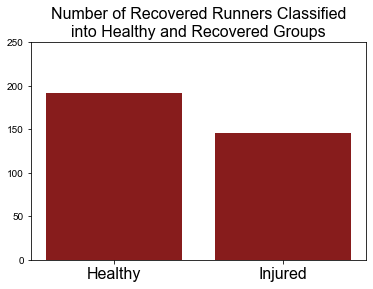

In [16]:
#counts of healthy and injured predictions
healthy_count = np.count_nonzero(y_pred == 1)
injured_count = np.count_nonzero(y_pred == 2)

print('Healthy Count:', healthy_count)
print('Injured Count:', injured_count)

plt.rcParams.update({'font.sans-serif':'Arial'})

fig = plt.figure()
classes = ['Healthy','Injured']
counts = [healthy_count, injured_count]
plt.bar(classes,counts, color=(0.53,.109,.109,1))
plt.title('Number of Recovered Runners Classified\ninto Healthy and Recovered Groups', size=16)
plt.ylim(0,250)
plt.xticks(size=16)

**Assign predictions to first and 21st minutes and count number of each prediction at these time points**

First Minute Healthy Count: 98
First Minute Injured Count: 73


([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

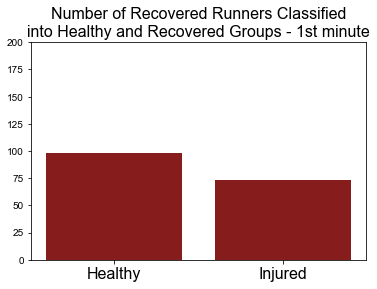

In [17]:
#assign first minute predictions to array 
first_min_preds = y_pred[0:171]

#counts of healthy and injured predictions
first_min_healthy_count = np.count_nonzero(first_min_preds == 1)
first_min_injured_count = np.count_nonzero(first_min_preds == 2)

print('First Minute Healthy Count:', first_min_healthy_count)
print('First Minute Injured Count:', first_min_injured_count)

plt.rcParams.update({'font.sans-serif':'Arial'})

fig = plt.figure()
classes = ['Healthy','Injured']
counts = [first_min_healthy_count, first_min_injured_count]
plt.bar(classes,counts, color=(0.53,.109,.109,1))
plt.title('Number of Recovered Runners Classified\ninto Healthy and Recovered Groups - 1st minute', size=16)
plt.ylim(0,200)
plt.xticks(size=16)

Final Minute Healthy Count: 94
Final Minute Injured Count: 73


([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

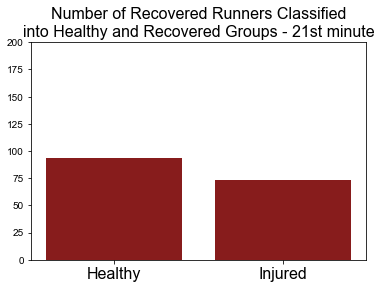

In [18]:
#assign final minute predictions
final_min_preds = y_pred[171::]

#counts of healthy and injured predictions
final_min_healthy_count = np.count_nonzero(final_min_preds == 1)
final_min_injured_count = np.count_nonzero(final_min_preds == 2)

print('Final Minute Healthy Count:', final_min_healthy_count)
print('Final Minute Injured Count:', final_min_injured_count)

plt.rcParams.update({'font.sans-serif':'Arial'})

fig = plt.figure()
classes = ['Healthy','Injured']
counts = [final_min_healthy_count, final_min_injured_count]
plt.bar(classes,counts, color=(0.53,.109,.109,1))
plt.title('Number of Recovered Runners Classified\ninto Healthy and Recovered Groups - 21st minute', size=16)
plt.ylim(0,200)
plt.xticks(size=16)

**To make some sense of this data, backtrack to look at the recovered subjects and see which ones classified into the respective groups**

In [19]:
#Since I divided the data into recovered_01 and recovered_021 before I concatenated the matrices, I know that the 
#first 171 strides are respective to the first minute and the next 167 strides are for the final minute

#create a directory of the original kinetic and kinematic V3D files
first_min_path = '/Users/rossbrancati/Desktop/PFP_Project/kinetic_kinematic/Data/resampled_data/recovered_01_resampled'
first_min_directory = sorted(os.listdir(first_min_path))

#create an array to store the number of strides per participant that is associated with each subjects at minute 1
first_min_stride_count = np.array([])

#loop over each file in the directory
for file_idx, file_id in enumerate(first_min_directory):
    #load the file
    file_path = os.path.join(first_min_path,file_id)
    raw_file = pd.read_csv(file_path,sep='\t',header=None)
    #count the number of columns and divide by 18 to get the number of strides
    num_rows,num_cols = raw_file.shape
    current_strides = int(num_cols/18)
    #get the current subjects ID
    current_subj_ID = int(file_id[1:3])
    #loop over the number of strides and append the stride count to the array
    for i in range(current_strides):
        first_min_stride_count = np.append(first_min_stride_count, current_subj_ID)
        
#concatenate the first minute predictions and the associated subjects IDs and convert to pandas dataframe
first_min_stride_preds = np.hstack((first_min_stride_count.reshape(-1,1), first_min_preds.reshape(-1,1)))
first_min_stride_preds = pd.DataFrame(first_min_stride_preds, columns=['Subject ID', 'Prediction'])

first_min_stride_preds
first_min_stride_preds.to_csv('/Users/rossbrancati/Desktop/PFP_Project/machine_learning/machine_learning_data/results_updated_december_2021/'+folder+'/first_min_preds.csv')

In [21]:
#create a directory of the original kinetic and kinematic V3D files
final_min_path = '/Users/rossbrancati/Desktop/PFP_Project/kinetic_kinematic/Data/resampled_data/recovered_021_resampled'
final_min_directory = sorted(os.listdir(final_min_path))

#create an array to store the number of strides per participant that is associated with each subjects at minute 1
final_min_stride_count = np.array([])

#loop over each file in the directory
for file_idx, file_id in enumerate(final_min_directory):
    #load the file
    file_path = os.path.join(final_min_path,file_id)
    raw_file = pd.read_csv(file_path,sep='\t',header=None)
    #count the number of columns and divide by 18 to get the number of strides
    num_rows,num_cols = raw_file.shape
    current_strides = int(num_cols/18)
    #get the current subjects ID
    current_subj_ID = int(file_id[1:3])
    #loop over the number of strides and append the stride count to the array
    for i in range(current_strides):
        final_min_stride_count = np.append(final_min_stride_count, current_subj_ID)
        
#concatenate the first minute predictions and the associated subjects IDs and convert to pandas dataframe
final_min_stride_preds = np.hstack((final_min_stride_count.reshape(-1,1), final_min_preds.reshape(-1,1)))
final_min_stride_preds = pd.DataFrame(final_min_stride_preds, columns=['Subject ID', 'Prediction'])

final_min_stride_preds
final_min_stride_preds.to_csv('/Users/rossbrancati/Desktop/PFP_Project/machine_learning/machine_learning_data/results_updated_december_2021/'+folder+'/final_min_preds.csv')